In [ ]:
import keras
keras.__version__

![word embeddings vs. one hot encoding](https://s3.amazonaws.com/book.keras.io/img/ch6/word_embeddings.png)

In [19]:
from keras.layers import Embedding

# Embedding 층은 적어도 두 개의 매개변수를 받습니다.
# 가능한 토큰의 개수(여기서는 1,000으로 단어 인덱스 최댓값 + 1입니다)와 임베딩 차원(여기서는 64)입니다
embedding_layer = Embedding(1000, 64)

### 아래는 실제로 실행이 안되는 코드임 
### 단순히 케라스 임베딩이 어떻게 동작되는지에 관한 의사코드이므로 참고만 하자
출처 [NLP위키독스](https://wikidocs.net/22885)

In [ ]:
# 문장 토큰화와 단어 토큰화
text=[['Hope', 'to', 'see', 'you', 'soon'],['Nice', 'to', 'see', 'you', 'again']]

# 각 단어에 대한 정수 인코딩
text=[[0, 1, 2, 3, 4],[5, 1, 2, 3, 6]]

# 위 데이터가 아래의 임베딩 층의 입력이 된다.
Embedding(7, 2, input_length=5)
# 7은 단어의 개수. 즉, 단어 집합(vocabulary)의 크기이다.
# 2는 임베딩한 후의 벡터의 크기이다.
# 5는 각 입력 시퀀스의 길이. 즉, input_length이다.

# 각 정수는 아래의 테이블의 인덱스로 사용되며 Embeddig()은 각 단어에 대해 임베딩 벡터를 리턴한다.
+------------+------------+
|   index    | embedding  |
+------------+------------+
|     0      | [1.2, 3.1] |
|     1      | [0.1, 4.2] |
|     2      | [1.0, 3.1] |
|     3      | [0.3, 2.1] |
|     4      | [2.2, 1.4] |
|     5      | [0.7, 1.7] |
|     6      | [4.1, 2.0] |
+------------+------------+
# 위의 표는 임베딩 벡터가 된 결과를 예로서 정리한 것이고 Embedding()의 출력인 3D 텐서를 보여주는 것이 아님.


In [ ]:
from keras.datasets import imdb
from keras import preprocessing

# 특성으로 사용할 단어의 수
max_features = 10000
# 사용할 텍스트의 길이(가장 빈번한 max_features 개의 단어만 사용합니다)
maxlen = 20

# 정수 리스트로 데이터를 로드합니다.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)



In [22]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(25000,) (25000,) (25000,) (25000,)


In [23]:
print(f"{x_train[0]}\n{y_train[0]}")


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [24]:
# 리스트를 (samples, maxlen) 크기의 2D 정수 텐서로 변환합니다.
# 데이터가 max_len보다 길면 데이터 자름 데이터가 길면 padding 설정, pre 앞에 0, post 뒤에 0 
# 모든 데이터 문장이 같은 길이로 맞춰져야 embedding layer 사용가능
x_train_pad = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test_pad = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [25]:
print(len(x_train[0]))
print(len(x_train_pad[0]))

218
20


In [24]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()

model.add(Embedding(10000, 8, input_length=maxlen)) 
#전체 단어사전내의 단어 갯수 10000개, 임베딩후 벡터크기 8maxlen은 시퀀스 길이

# 3D 임베딩 텐서를 (samples, maxlen * 8) 크기의 2D 텐서로 펼칩니다.
model.add(Flatten())

# 분류기를 추가합니다.
model.add(Dense(1, activation='sigmoid')) # 바이너리라서 sigmoid
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train_pad, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_3 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 3s 131us/step - loss: 0.6689 - acc: 0.6295 - val_loss: 0.6157 - val_acc: 0.6998
Epoch 2/10
20000/20000 [==============================] - 2s 109us/step - loss: 0.5356 - acc: 0.7545 - val_loss: 0.5192 - val_acc: 0.7398
Epoch 3/10
20000/20000 [==============================

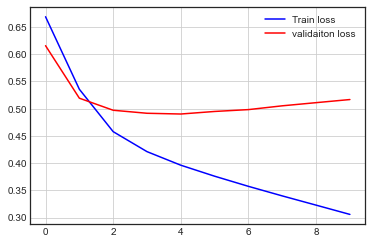

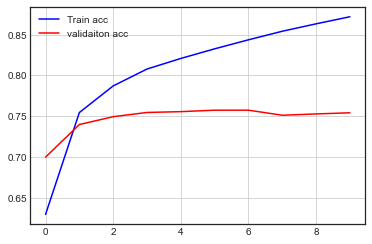

In [33]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn-white')
hist_dict = history.history
plt.plot(hist_dict['loss'], 'b-', label='Train loss')
plt.plot(hist_dict['val_loss'], 'r-', label='validaiton loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(hist_dict['acc'], 'b-', label='Train acc')
plt.plot(hist_dict['val_acc'], 'r-', label='validaiton acc')
plt.legend()
plt.grid()

plt.show()

#오버피팅

In [34]:
model.evaluate(x_train_pad, y_test)

25000/25000 [==============================] - 0s 12us/step


[1.503844743347168, 0.4986799955368042]

# 단어 수 500개로 늘려보기
### 출처 [이수안 컴퓨터연구소](https://www.youtube.com/watch?v=13HOC0z6WLM)

In [38]:
# 단어 수 늘리기 기존에는 한리뷰에서 20개의 단어만 상요
num_words = 1000
max_len = 500
x_train_pad_2 = preprocessing.sequence.pad_sequences(x_train, maxlen=max_len, padding='pre')
x_test_pad_2 = preprocessing.sequence.pad_sequences(x_test, maxlen=max_len, padding='pre')

In [40]:
print(x_train[0])
print(x_train_pad_2[0])
print(len(x_train[0]))
print(len(x_train_pad_2[0]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
[   0    0    0    0    0    0    0    0    0    0    0    0

In [42]:
model = Sequential()
# 나중에 임베딩된 입력을 Flatten 층에서 펼치기 위해 Embedding 층에 input_length를 지정합니다.
model.add(Embedding(10000, 8, input_length=max_len))
# Embedding 층의 출력 크기는 (samples, maxlen, 8)가 됩니다.

# 3D 임베딩 텐서를 (samples, maxlen * 8) 크기의 2D 텐서로 펼칩니다.
model.add(Flatten())

# 분류기를 추가합니다.
model.add(Dense(1, activation='sigmoid')) # 바이너리랄서 
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history2 = model.fit(x_train_pad_2, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 500, 8)            80000     
_________________________________________________________________
flatten_5 (Flatten)          (None, 4000)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 4001      
Total params: 84,001
Trainable params: 84,001
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 8s 375us/step - loss: 0.5661 - acc: 0.7159 - val_loss: 0.3788 - val_acc: 0.8502
Epoch 2/10
20000/20000 [==============================] - 7s 352us/step - loss: 0.2910 - acc: 0.8876 - val_loss: 0.2884 - val_acc: 0.8852
Epoch 3/10
20000/20000 [==============================]

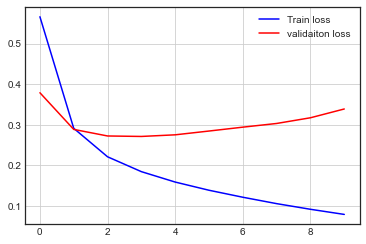

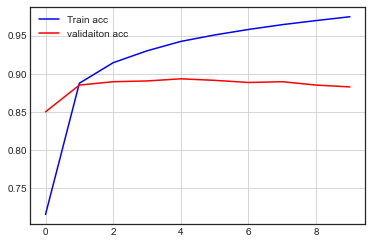

In [43]:

plt.style.use('seaborn-white')
hist_dict = history.history
plt.plot(hist_dict['loss'], 'b-', label='Train loss')
plt.plot(hist_dict['val_loss'], 'r-', label='validaiton loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(hist_dict['acc'], 'b-', label='Train acc')
plt.plot(hist_dict['val_acc'], 'r-', label='validaiton acc')
plt.legend()
plt.grid()

plt.show()

#오버피팅

In [47]:
model.evaluate(x_test_pad_2, y_test)

25000/25000 [==============================] - 1s 26us/step


[0.3505166466474533, 0.8746399879455566]

# 결과는 나쁘지 않으나 과적합이 되는이유?
-  단어간 관계나 문장구조나 의미적 연결 고려하지 않고 임베딩만됨
-  시퀀스 전체를 고려한 특성을 학습하는 것은 embedding 위에 RNN이나  1d 합성곱 추가하는 것이 좋다고함..
- 그냥 임베딩 하면 안됨

## 사전 훈련된 단어 임베딩 사용하기

- 케라스의 `Embedding` 층을 위해 내려받을 수 있는 미리 계산된 단어 임베딩 데이터베이스가 여럿 있습니다. Word2vec은 그 중 하나입니다. 인기 있는 또 다른 하나는 2014년 스탠포드 대학의 연구자들이 개발한 GloVe(Global Vectors for Word Representation)입니다. 이 임베딩 기법은 단어의 동시 출현 통계를 기록한 행렬을 분해하는 기법을 사용합니다. 이 개발자들은 위키피디아 데이터와 커먼 크롤 데이터에서 가져온 수백만 개의 영어 토큰에 대해서 임베딩을 미리 계산해 놓았습니다.

- GloVe 임베딩을 케라스 모델에 어떻게 사용하는지 알아보죠. Word2vec 임베딩이나 다른 단어 임베딩 데이터베이스도 방법은 같습니다. 앞서 보았던 텍스트 토큰화 기법도 다시 살펴보겠습니다. 원본 텍스트에서 시작해서 완전한 모델을 구성해 보겠습니다.

## 모든 내용을 적용하기: 원본 텍스트에서 단어 임베딩까지

앞서 만들었던 것과 비슷한 모델을 사용하겠습니다. 문장들을 벡터의 시퀀스로 임베딩하고 펼친 다음 그 위에 `Dense` 층을 훈련합니다. 여기서는 사전 훈련된 단어 임베딩을 사용하겠습니다. 케라스에 포함된 IMDB 데이터는 미리 토큰화가 되어 있습니다. 이를 사용하는 대신 원본 텍스트 데이터를 다운로딩해서 처음부터 시작하겠습니다.

### 원본 IMDB 텍스트 다운로드하기

먼저 http://mng.bz/0tIo 에서 IMDB 원본 데이터셋을 다운로드하고 압축을 해제합니다.

훈련용 리뷰 하나를 문자열 하나로 만들어 훈련 데이터를 문자열의 리스트로 구성해 보죠. 리뷰 레이블(긍정/부정)도 `labels` 리스트로 만들겠습니다:

In [40]:
import os

imdb_dir = './datasets/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [2]:
texts[0]

"Working with one of the best Shakespeare sources, this film manages to be creditable to it's source, whilst still appealing to a wider audience.<br /><br />Branagh steals the film from under Fishburne's nose, and there's a talented cast on good form."

### 데이터 토큰화

이전 절에서 소개한 개념을 사용해 텍스트를 벡터로 만들고 훈련 세트와 검증 세트로 나누겠습니다. 사전 훈련된 단어 임베딩은 훈련 데이터가 부족한 문제에 특히 유용합니다(그렇지 않으면 문제에 특화된 임베딩이 훨씬 성능이 좋습니다). 그래서 다음과 같이 훈련 데이터를 처음 200개의 샘플로 제한합니다. 이 모델은 200개의 샘플을 학습한 후에 영화 리뷰를 분류할 것입니다.

In [29]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100  # 100개 단어 이후는 버립니다
training_samples = 200  # 훈련 샘플은 200개입니다
validation_samples = 10000  # 검증 샘플은 10,000개입니다
max_words = 10000  # 데이터셋에서 가장 빈도 높은 10,000개의 단어만 사용합니다

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
# word_index = tokenizer.word_index
# print('%s개의 고유한 토큰을 찾았습니다.' % len(word_index))



In [5]:
tokenizer

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels) # 넘파이러 바꿔줌
print('데이터 텐서의 크기:', data.shape)
print('레이블 텐서의 크기:', labels.shape)


데이터 텐서의 크기: (25000, 100)
레이블 텐서의 크기: (25000,)


In [35]:

# 데이터를 훈련 세트와 검증 세트로 분할합니다.
# 샘플이 순서대로 있기 때문에 (부정 샘플이 모두 나온 후에 긍정 샘플이 옵니다) 
# 먼저 데이터를 섞습니다.
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]


In [36]:

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

### GloVe 단어 임베딩 내려받기

https://nlp.stanford.edu/projects/glove 에서 2014년 영문 위키피디아를 사용해 사전에 계산된 임베딩을 내려받습니다. 이 파일의 이름은 glove.6B.zip이고 압축 파일 크기는 823MB입니다. 400,000만개의 단어(또는 단어가 아닌 토큰)에 대한 100차원의 임베딩 벡터를 포함하고 있습니다. datasets 폴더 아래에 파일 압축을 해제합니다.(이 저장소에는 이미 포함되어 있습니다)

### 임베딩 전처리

압축 해제한 파일(.txt 파일)을 파싱하여 단어(즉 문자열)와 이에 상응하는 벡터 표현(즉 숫자 벡터)를 매핑하는 인덱스를 만듭니다.

In [7]:
glove_dir = './datasets/'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('%s개의 단어 벡터를 찾았습니다.' % len(embeddings_index))

400000개의 단어 벡터를 찾았습니다.


In [15]:
list(embeddings_index.items())[101]

('them',
 array([-1.0131e-01,  1.0941e-01,  2.4065e-01, -6.6767e-01, -1.8687e-01,
         9.1068e-01, -4.9355e-01,  2.2234e-01, -6.8759e-04, -2.6330e-01,
         3.5566e-01,  2.5153e-01,  2.7620e-01,  2.5009e-01,  5.8282e-01,
        -6.3401e-01,  4.7375e-02,  1.8918e-01, -8.2015e-01,  6.8126e-01,
         2.0599e-01, -3.9743e-01,  6.6879e-01, -1.9695e-01,  7.2995e-03,
        -4.5157e-01, -4.4265e-01, -6.6212e-01,  3.9773e-01, -2.7854e-01,
         2.4966e-01,  2.9716e-01, -4.1428e-01, -1.9447e-01,  1.1666e-01,
         2.9235e-01, -5.6770e-02,  5.1592e-02, -3.2637e-01, -4.3910e-01,
        -7.7075e-01, -1.8956e-01, -2.0683e-01, -6.6622e-01, -9.1887e-02,
        -3.9072e-02, -2.7523e-01,  1.7081e-01, -5.8020e-01, -6.8760e-01,
        -7.9209e-02,  2.8970e-01, -9.7517e-02,  1.8687e+00, -2.7563e-01,
        -2.1903e+00,  3.5603e-01, -3.7762e-01,  1.9264e+00,  2.1876e-01,
        -2.1676e-01,  1.5126e+00, -2.1941e-01,  3.3431e-01,  4.7717e-01,
         2.2636e-02,  1.1532e+00,  8.6151e

# glove embedding 확인

그다음 `Embedding` 층에 주입할 수 있도록 임베딩 행렬을 만듭니다. 이 행렬의 크기는 `(max_words, embedding_dim)`이어야 합니다. 이 행렬의 `i`번째 원소는 (토큰화로 만든) 단어 인덱스의 `i`번째 단어에 상응하는 `embedding_dim` 차원 벡터입니다. 인덱스 `0`은 어떤 단어나 토큰도 아닐 경우를 나타냅니다.

In [ ]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in list(word_index.items())[:10]:
    embedding_vector = embeddings_index.get(word)
    print(i)
    if i < max_words:
        if embedding_vector is not None:
            # 임베딩 인덱스에 없는 단어는 모두 0이 됩니다.
            embedding_matrix[i] = embedding_vector

In [42]:
embedding_matrix[1]

array([-0.038194  , -0.24487001,  0.72812003, -0.39961001,  0.083172  ,
        0.043953  , -0.39140999,  0.3344    , -0.57545   ,  0.087459  ,
        0.28786999, -0.06731   ,  0.30906001, -0.26383999, -0.13231   ,
       -0.20757   ,  0.33395001, -0.33848   , -0.31742999, -0.48335999,
        0.1464    , -0.37303999,  0.34577   ,  0.052041  ,  0.44946   ,
       -0.46970999,  0.02628   , -0.54154998, -0.15518001, -0.14106999,
       -0.039722  ,  0.28277001,  0.14393   ,  0.23464   , -0.31020999,
        0.086173  ,  0.20397   ,  0.52623999,  0.17163999, -0.082378  ,
       -0.71787   , -0.41531   ,  0.20334999, -0.12763   ,  0.41367   ,
        0.55186999,  0.57907999, -0.33476999, -0.36559001, -0.54856998,
       -0.062892  ,  0.26583999,  0.30204999,  0.99774998, -0.80480999,
       -3.0243001 ,  0.01254   , -0.36941999,  2.21670008,  0.72201002,
       -0.24978   ,  0.92136002,  0.034514  ,  0.46744999,  1.10790002,
       -0.19358   , -0.074575  ,  0.23353   , -0.052062  , -0.22

### 모델 정의하기

이전과 동일한 구조의 모델을 사용하겠습니다:

In [9]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


### 모델에 GloVe 임베딩 로드하기

`Embedding` 층은 하나의 가중치 행렬을 가집니다. 이 행렬은 2D 부동 소수 행렬이고 각 `i`번째 원소는 `i`번째 인덱스에 상응하는 단어 벡터입니다. 간단하네요. 모델의 첫 번째 층인 `Embedding` 층에 준비된 GloVe 행렬을 로드하세요:

In [10]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

추가적으로 `Embedding` 층을 동결합니다(`trainable` 속성을 `False`로 설정합니다). 사전 훈련된 컨브넷 특성을 사용할 때와 같은 이유입니다. 모델의 일부는 (`Embedding` 층처럼) 사전 훈련되고 다른 부분은 (최상단 분류기처럼) 랜덤하게 초기화되었다면 훈련하는 동안 사전 훈련된 부분이 업데이트되면 안됩니다. 이미 알고 있던 정보를 모두 잃게 됩니다. 랜덤하게 초기화된 층에서 대량의 그래디언트 업데이트가 발생하면 이미 학습된 특성을 오염시키기 때문입니다.

### 모델 훈련과 평가

모델을 컴파일하고 훈련합니다:

In [11]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 4ms/step - loss: 1.1947 - acc: 0.4850 - val_loss: 0.7249 - val_acc: 0.4968
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5433 - acc: 0.7550 - val_loss: 0.8005 - val_acc: 0.5064
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5183 - acc: 0.7400 - val_loss: 0.7343 - val_acc: 0.5056
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4118 - acc: 0.8550 - val_loss: 0.8596 - val_acc: 0.4950
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2962 - acc: 0.9800 - val_loss: 0.6805 - val_acc: 0.5741
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2067 - acc: 0.9900 - val_loss: 0.8920 - val_acc: 0.5004
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3357 - acc: 0.8600 - val_loss: 0.7399 - val_acc: 0.5455
Epoch 8/10
200/200 [========

이제 모델의 성능을 그래프로 그려 보겠습니다:

In [12]:
import matplotlib.pyplot as plt

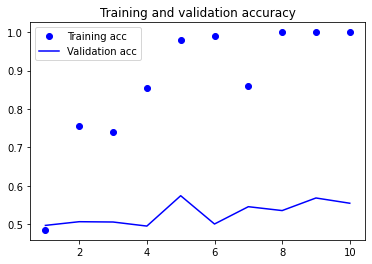

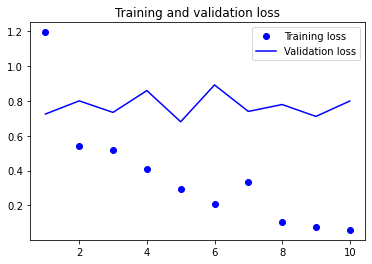

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

이 모델은 과대적합이 빠르게 시작됩니다. 훈련 샘플 수가 작기 때문에 놀라운 일은 아닙니다. 같은 이유로 검증 정확도와 훈련 정확도 사이에 차이가 큽니다. 검증 정확도는 50% 후반을 달성한 것 같습니다.

훈련 샘플 수가 적기 때문에 어떤 샘플 200개를 선택했는지에 따라 성능이 크게 좌우됩니다. 여기서는 샘플들을 랜덤하게 선택했습니다. 만약 선택한 샘플에서 성능이 나쁘면 예제를 위해서 랜덤하게 200개의 샘플을 다시 추출하세요(실전에서는 훈련 데이터를 고르지 않습니다).

사전 훈련된 단어 임베딩을 사용하지 않거나 임베딩 층을 동결하지 않고 같은 모델을 훈련할 수 있습니다. 이런 경우 해당 작업에 특화된 입력 토큰의 임베딩을 학습할 것입니다. 데이터가 풍부하게 있다면 사전 훈련된 단어 임베딩보다 일반적으로 훨씬 성능이 높습니다. 여기서는 훈련 샘플이 200개뿐이지만 한 번 시도해 보죠:

In [14]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 5ms/step - loss: 0.6950 - acc: 0.4900 - val_loss: 0.6948 - val_acc: 0.4922
Epoch 2/10
200/200 [==============================] - 1s 3ms/s

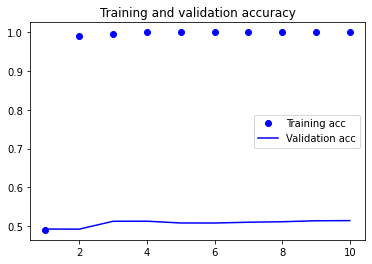

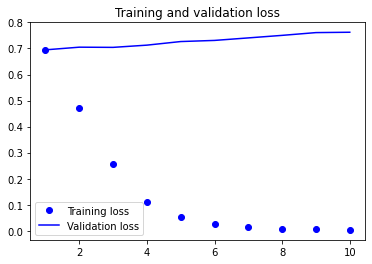

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

검증 정확도는 50% 초반에 멈추어 있습니다. 이 예제에서는 사전 훈련된 단어 임베딩을 사용하는 것이 임베딩을 함께 훈련하는 것보다 낫습니다. 훈련 샘플의 수를 늘리면 금새 상황이 바뀝니다. 연습삼아 한 번 확인해 보세요.

훈련 샘플의 수를 2000개로 늘려서 확인해 보겠습니다.

In [16]:
training_samples = 2000
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [17]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Train on 2000 samples, validate on 10000 samples
Epoch 1/10
2000/2000 [==============================] - 2s 863us/step - loss: 0.6259 - acc: 0.6225 - val_loss: 0.6645 - val_acc: 0.6146
Epoch 2/10
2000/2000 [==============================] - 2s 899us/step - loss: 0.1582 - acc: 0.9830 - val_loss: 0.6165 - val_acc: 0.6758
Epoch 3/10
2000/2000 [==============================] - 2s 888us/step - loss: 0.0194 - acc: 0.9995 - val_loss: 0.6355 - val_acc: 0.6994
Epoch 4/10
2000/2000 [==============================] - 2s 881us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.6867 - val_acc: 0.7040
Epoch 5/10
2000/2000 [==============================] - 2s 875us/step - loss: 1.4710e-04 - acc: 1.0000 - val_loss: 0.7412 - val_acc: 0.7111
Epoch 6/10
2000/2000 [==============================] - 2s 866us/step - loss: 1.0116e-05 - acc: 1.0000 - val_loss: 0.7919 - val_acc: 0.7167
Epoch 7/10
2000/2000 [==============================] - 2s 871us/step - loss: 1.0670e-06 - acc: 1.0000 - val_loss: 0.8610 - val

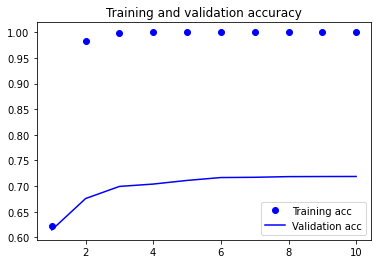

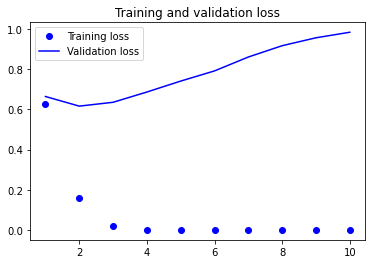

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.evaluate(x_test, y_test)

훈련 샘플의 수를 늘리니 단어 임베딩을 같이 훈련하는 모델의 검증 정확도가 70%를 넘었습니다.

마지막으로 테스트 데이터에서 모델을 평가해 보죠. 먼저 테스트 데이터를 토큰화해야 합니다:

In [19]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [ ]:
# pip install 'h5py==2.10.0' --force-reinstall

그다음 이 절의 첫 번째 모델을 로드하고 평가합니다:

In [21]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 93us/step


[0.8062738862037658, 0.5494800209999084]